# Titanic 

Este é um notebook experimental para estudo do problema Titanic disponível na plataforma Kaggle.

## Bibliotecas utililizadas

Na célula a seguir, fazemos as importações das bibliotecas utilizadas no projeto para manipulação dos dados.

In [1]:
import pandas as pd
import numpy as np

Na célula a seguir, fazemos as importações das bibliotecas para visualização dos dados.

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Na célula a seguir, fazemos as importações das bibliotecas para predição dos dados.

## Importando dados

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Limpeza e Transformação dos Dados

Na célula a seguir, fazemos a concatenação dos dados do arquivo train com os dados do arquivo test.

In [6]:
df = df_train.append(df_test,ignore_index=True,sort=False)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Na célula a seguir, fazemos a remoção de algumas colunas.

In [7]:
df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,NaN,S


Na célula a seguir, verificamos a quantidade de valores faltosos por atributos.

In [8]:
df.isnull().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

Na célula a seguir, trasformamos os dados da coluna Sex para os valores female: 0 e male:1.

In [9]:
df['Sex'] = df['Sex'].map({'female': 0,'male': 1})
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,NaN,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C105,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,NaN,S
1307,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,NaN,S


Na célula a seguir, transformamos os dados da coluna Cabin para valores binário. Os valors NaN são substituído por 0, caso contrário 1.

In [10]:
df['Cabin'] = df.apply(lambda x: 0 if x['Cabin'] is np.nan else 1,axis=1)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,S
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1,C
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,S
1307,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,S


Na célula a seguir, fazemos a substituição dos valores faltosos da coluna Embarket para S.

In [11]:
df['Embarked'] = df['Embarked'].fillna('S')

Na célula a seguir, transformamos os valores da coluna Embarked de categórico para Binário.

In [12]:
embarked = pd.get_dummies(df['Embarked'],prefix='Embarked')
df = pd.concat([df,embarked],axis=1,sort=False)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,S,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,C,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,S,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,S,0,0,1
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,S,0,0,1
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1,C,1,0,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,S,0,0,1
1307,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,S,0,0,1


Na célula a seguir, removemos a coluna Embarked.

In [13]:
df.drop(['Embarked'],axis=1,inplace=True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,0,1
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1,0,0
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,0,1
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0,0,1
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,0,0,1
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1,1,0,0
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,0,0,1
1307,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,0,0,1


Na célula a seguir, faremos a substituição do valor faltoso da coluna Fare levando em consideração o preço médio da tarifa em relação por Pclass.

In [14]:
df.loc[pd.isna(df['Fare'])]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S
1043,NaN,3,"Storey, Mr. Thomas",1,60.5,0,0,NaN,0,0,0,1


In [15]:
medias = df[['Pclass','Fare']].groupby('Pclass').mean()['Fare']
medias

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [16]:
df['Fare'] = df['Fare'].fillna(medias[3])

In [17]:
df.loc[1043]

Survived                     NaN
Pclass                         3
Name          Storey, Mr. Thomas
Sex                            1
Age                         60.5
SibSp                          0
Parch                          0
Fare                     13.3029
Cabin                          0
Embarked_C                     0
Embarked_Q                     0
Embarked_S                     1
Name: 1043, dtype: object

Na célula a seguir, vamos extrair os título das pessoas da coluna Name.

In [18]:
title = [i.split(",")[1].split(".")[0].strip() for i in df["Name"]]
df['Title'] = title
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,0,0,0,1,Mr
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,1,1,0,0,Mrs
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,0,0,0,1,Miss
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,1,0,0,1,Mrs
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,0,0,0,1,Mr
1305,NaN,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,1,1,0,0,Dona
1306,NaN,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,0,0,0,1,Mr
1307,NaN,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,0,0,0,1,Mr


In [19]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [20]:
df.drop(['Name'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,0.0,3,1,22.0,1,0,7.2500,0,0,0,1,Mr
1,1.0,1,0,38.0,1,0,71.2833,1,1,0,0,Mrs
2,1.0,3,0,26.0,0,0,7.9250,0,0,0,1,Miss
3,1.0,1,0,35.0,1,0,53.1000,1,0,0,1,Mrs
4,0.0,3,1,35.0,0,0,8.0500,0,0,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,NaN,0,0,8.0500,0,0,0,1,Mr
1305,NaN,1,0,39.0,0,0,108.9000,1,1,0,0,Dona
1306,NaN,3,1,38.5,0,0,7.2500,0,0,0,1,Mr
1307,NaN,3,1,NaN,0,0,8.0500,0,0,0,1,Mr


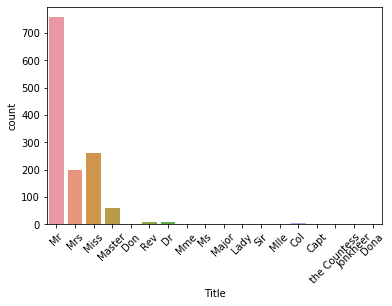

In [21]:
g = sns.countplot(x="Title",data=df)
g = plt.setp(g.get_xticklabels(),rotation=45) 

Na célula a seguir, transformando os valores da coluna Titulo para numérico.

0: Mr

1: Mrs/Miss/Mme/Ms

2: Master

3: Don/Rev/Dr/Major/Lady/Sir/Mlle/Col/Capt/the Countess/Jonkheer/Dona

In [22]:
df['Title'] = df['Title'].map({'Mr': 0, 'Mrs':1, 'Miss': 1, 'Mme': 1, 'Ms': 1, 'Master': 2, 'Don': 3, 'Rev': 3, 'Dr': 3, 'Major': 3, 'Lady': 3, 'Sir': 3, 'Mlle': 3, 'Col': 3, 'Capt': 3, 'the Countess': 3, 'Jonkheer': 3, 'Dona': 3})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
0,0.0,3,1,22.0,1,0,7.2500,0,0,0,1,0
1,1.0,1,0,38.0,1,0,71.2833,1,1,0,0,1
2,1.0,3,0,26.0,0,0,7.9250,0,0,0,1,1
3,1.0,1,0,35.0,1,0,53.1000,1,0,0,1,1
4,0.0,3,1,35.0,0,0,8.0500,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,NaN,0,0,8.0500,0,0,0,1,0
1305,NaN,1,0,39.0,0,0,108.9000,1,1,0,0,3
1306,NaN,3,1,38.5,0,0,7.2500,0,0,0,1,0
1307,NaN,3,1,NaN,0,0,8.0500,0,0,0,1,0


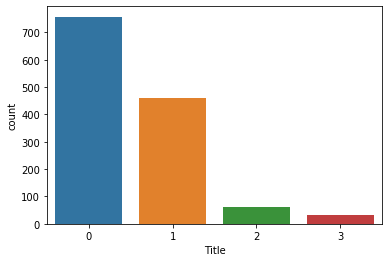

In [23]:
g = sns.countplot(x="Title",data=df)

Na célula a seguir, calculamos a média das idades a partir do título.

In [24]:
media_idade_por_titulo = df[['Title','Age']].groupby('Title').mean()
media_idade_por_titulo

,Age
Title,
0,32.252151
1,28.569607
2,5.482642
3,43.766667


In [25]:
df.loc[pd.isna(df['Age'])]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
5,0.0,3,1,NaN,0,0,8.4583,0,0,1,0,0
17,1.0,2,1,NaN,0,0,13.0000,0,0,0,1,0
19,1.0,3,0,NaN,0,0,7.2250,0,1,0,0,1
26,0.0,3,1,NaN,0,0,7.2250,0,1,0,0,0
28,1.0,3,0,NaN,0,0,7.8792,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,3,0,NaN,0,0,7.7208,0,0,1,0,1
1301,NaN,3,0,NaN,0,0,7.7500,0,0,1,0,1
1304,NaN,3,1,NaN,0,0,8.0500,0,0,0,1,0
1307,NaN,3,1,NaN,0,0,8.0500,0,0,0,1,0


In [26]:
media_idade_por_titulo['Age'][0]

32.25215146299484

Na célula a seguir, recuperamos os índices de todas as linhas onde o valor da coluna Age é NaN.

In [27]:
index_age_nan = df['Age'][df['Age'].isnull()].index
index_age_nan

Int64Index([   5,   17,   19,   26,   28,   29,   31,   32,   36,   42,
            ...
            1256, 1257, 1271, 1273, 1275, 1299, 1301, 1304, 1307, 1308],
           dtype='int64', length=263)

In [28]:
for i in list(index_age_nan):
    df.loc[i,'Age'] = media_idade_por_titulo['Age'][df.loc[i,'Title']]
    
df.loc[index_age_nan]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title
5,0.0,3,1,32.252151,0,0,8.4583,0,0,1,0,0
17,1.0,2,1,32.252151,0,0,13.0000,0,0,0,1,0
19,1.0,3,0,28.569607,0,0,7.2250,0,1,0,0,1
26,0.0,3,1,32.252151,0,0,7.2250,0,1,0,0,0
28,1.0,3,0,28.569607,0,0,7.8792,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,NaN,3,0,28.569607,0,0,7.7208,0,0,1,0,1
1301,NaN,3,0,28.569607,0,0,7.7500,0,0,1,0,1
1304,NaN,3,1,32.252151,0,0,8.0500,0,0,0,1,0
1307,NaN,3,1,32.252151,0,0,8.0500,0,0,0,1,0


A célula a seguir, calcula o tamanho da família.

In [29]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize
0,0.0,3,1,22.000000,1,0,7.2500,0,0,0,1,0,2
1,1.0,1,0,38.000000,1,0,71.2833,1,1,0,0,1,2
2,1.0,3,0,26.000000,0,0,7.9250,0,0,0,1,1,1
3,1.0,1,0,35.000000,1,0,53.1000,1,0,0,1,1,2
4,0.0,3,1,35.000000,0,0,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,0,0,8.0500,0,0,0,1,0,1
1305,NaN,1,0,39.000000,0,0,108.9000,1,1,0,0,3,1
1306,NaN,3,1,38.500000,0,0,7.2500,0,0,0,1,0,1
1307,NaN,3,1,32.252151,0,0,8.0500,0,0,0,1,0,1


In [30]:
df.drop(['SibSp','Parch'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize
0,0.0,3,1,22.000000,7.2500,0,0,0,1,0,2
1,1.0,1,0,38.000000,71.2833,1,1,0,0,1,2
2,1.0,3,0,26.000000,7.9250,0,0,0,1,1,1
3,1.0,1,0,35.000000,53.1000,1,0,0,1,1,2
4,0.0,3,1,35.000000,8.0500,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1304,NaN,3,1,32.252151,8.0500,0,0,0,1,0,1
1305,NaN,1,0,39.000000,108.9000,1,1,0,0,3,1
1306,NaN,3,1,38.500000,7.2500,0,0,0,1,0,1
1307,NaN,3,1,32.252151,8.0500,0,0,0,1,0,1


# Análise dos Dados

In [57]:
df.loc[0:len(df_train)-1].describe()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked_C,Embarked_Q,Embarked_S,Title,FamilySize
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.879980,32.204208,0.228956,0.188552,0.086420,0.725028,0.520763,1.904602
std,0.486592,0.836071,0.477990,13.146298,49.693429,0.420397,0.391372,0.281141,0.446751,0.712935,1.613459
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,2.000000,0.000000,22.000000,7.910400,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,3.000000,1.000000,30.000000,14.454200,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,31.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,512.329200,1.000000,1.000000,1.000000,1.000000,3.000000,11.000000


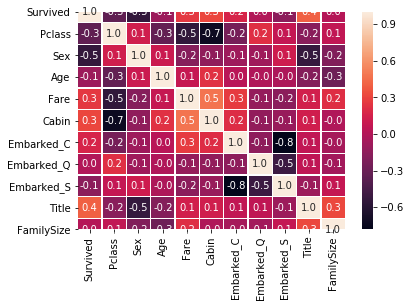

In [53]:
g = sns.heatmap(df.loc[0:len(df_train)-1].corr(),annot=True,fmt=".1f",linewidths=0.2)

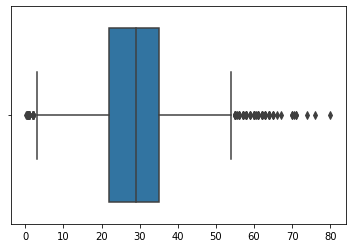

In [61]:
sns.boxplot(x='Age',data=df)

Na célula a seguir, vamos substituir as idades menores que um ano de idade para 1.

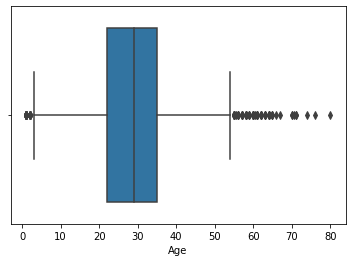

In [74]:
df.loc[df['Age'] < 1] = 1
sns.boxplot(x='Age',data=df)